In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
time_data = pd.read_csv('D:/Vivek/Vivek/assingment/4 Simple Linear Regration//delivery_time.csv')
time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
corr_=time_data.corr()   

<AxesSubplot:>

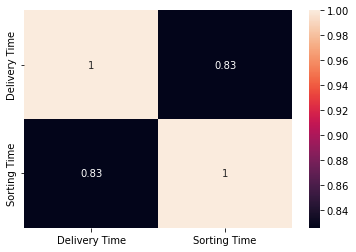

In [5]:
sns.heatmap(corr_,annot=True)

In [6]:
time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


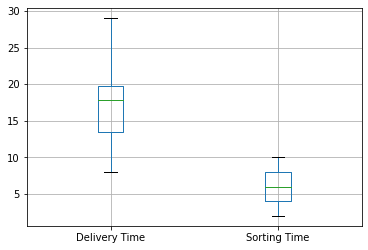

In [7]:
time_data.boxplot()
plt.show()

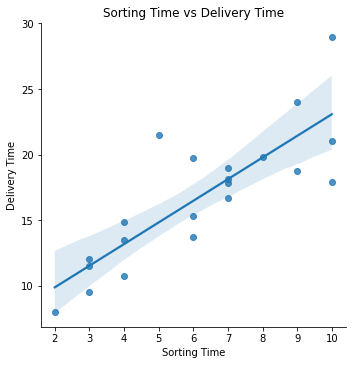

In [8]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=time_data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

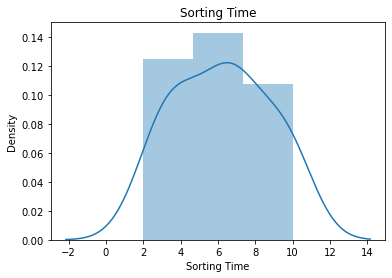

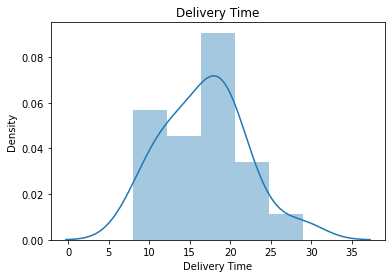

In [9]:
sns.distplot(a=time_data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=time_data['Delivery Time'])
plt.title('Delivery Time')
plt.show()


Model Building and Model Training

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
time_data.columns=['Delivery','Sorting']       
time_data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
linear_model=smf.ols("Delivery~Sorting",data=time_data).fit()

In [13]:
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [14]:
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [15]:
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
time_data['log_sorting']=np.log(time_data['Sorting'])

In [18]:
time_data.head()

,Delivery,Sorting,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


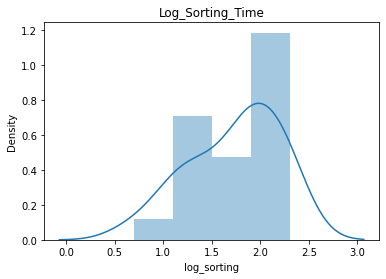

In [19]:
sns.distplot(time_data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

In [20]:
linear_model_1=smf.ols("Delivery~log_sorting",data=time_data).fit()

In [21]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.64e-06
Time:                        21:23:36   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [23]:
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [24]:
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [25]:
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

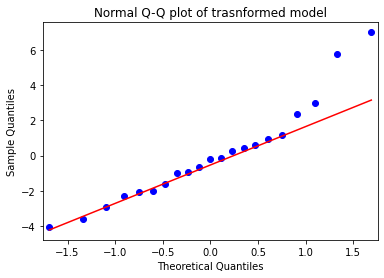

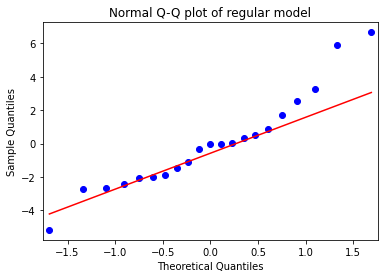

In [26]:
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

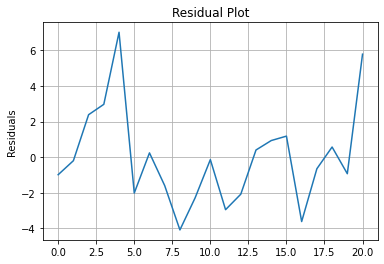

In [27]:
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [28]:
pred_y=linear_model_1.fittedvalues
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

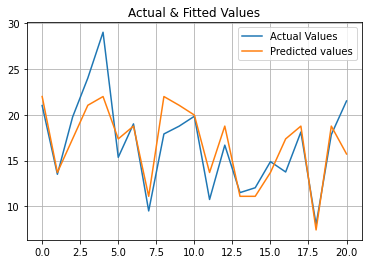

In [29]:
plt.plot(time_data["Delivery"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

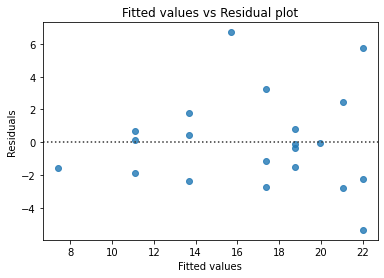

In [30]:
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

salary

In [31]:
salary_data = pd.read_csv('D:/Vivek/Vivek/assingment/4 Simple Linear Regration/Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
cor = salary_data.corr() 
cor

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

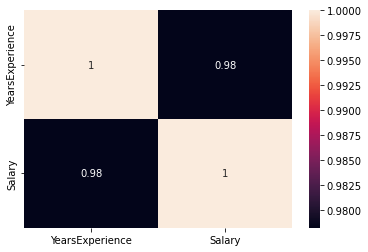

In [35]:
sns.heatmap(cor,annot=True)

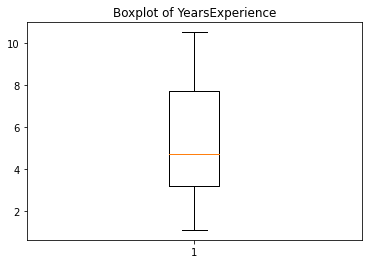

In [36]:
plt.boxplot(x='YearsExperience',data=salary_data)
plt.title("Boxplot of YearsExperience")
plt.show()

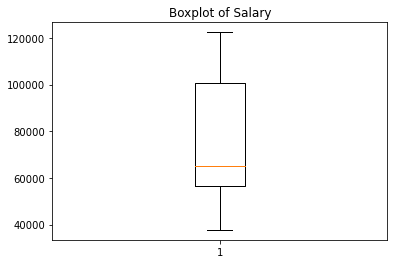

In [37]:
plt.boxplot(x='Salary',data=salary_data)
plt.title("Boxplot of Salary")
plt.show()

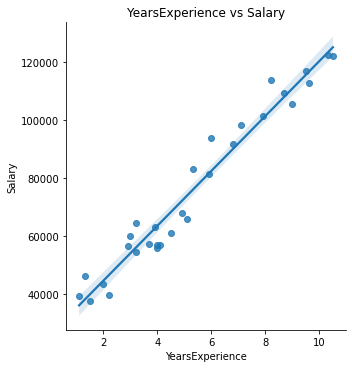

In [38]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

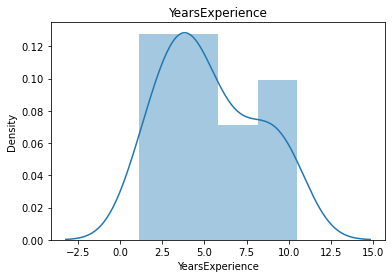

In [39]:
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience')
plt.show()

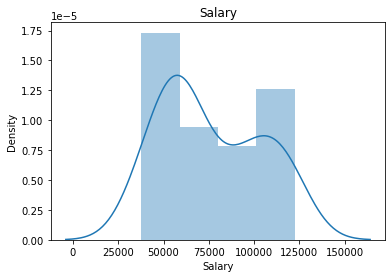

In [40]:
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

In [41]:
salary_data=salary_data.rename(columns={"YearsExperience":"X",'Salary':'y'})
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
model = smf.ols('y~X',data=salary_data).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.14e-20
Time:                        21:24:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940
X            24.950094
dtype: float64 
 Intercept    5.511950e-12
X            1.143068e-20
dtype: float64


In [45]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

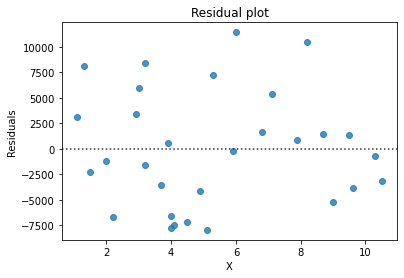

In [46]:
sns.residplot(x=salary_data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

In [47]:
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
salary_data['log_x'] = np.log(salary_data['X'])

In [49]:
salary_data.head()

,X,y,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


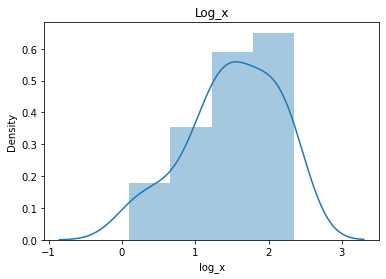

In [50]:
sns.distplot(salary_data['log_x'])
plt.title("Log_x")
plt.show()

In [51]:
model_1 = smf.ols('y~log_x',data=salary_data).fit()

In [52]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 20 May 2022   Prob (F-statistic):           3.25e-13
Time:                        21:24:17   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

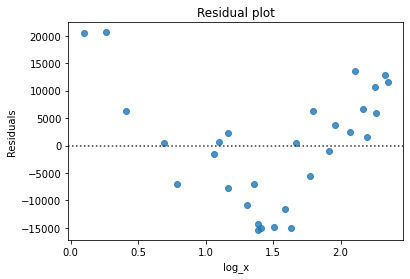

In [53]:
sns.residplot(x=salary_data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

In [54]:
salary_data['sqrt_x'] = np.sqrt(salary_data['X'])

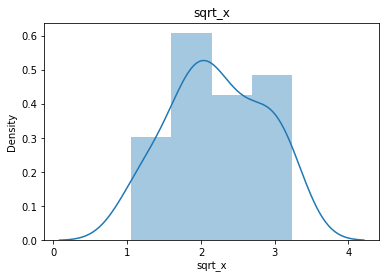

In [55]:
sns.distplot(salary_data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

In [56]:
model_2 = smf.ols('y~sqrt_x',data=salary_data).fit()

In [57]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 20 May 2022   Prob (F-statistic):           8.57e-18
Time:                        21:24:21   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model_2.rsquared

0.9310009544993526

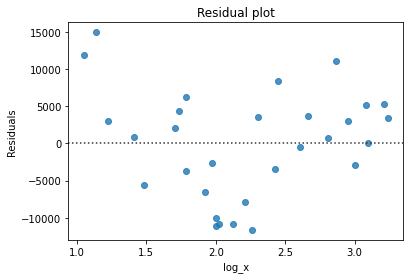

In [59]:
sns.residplot(x=salary_data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

In [60]:
salary_data['res_proc_y']  = 1/salary_data['y']

In [61]:
salary_data.head()

,X,y,log_x,sqrt_x,res_proc_y
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


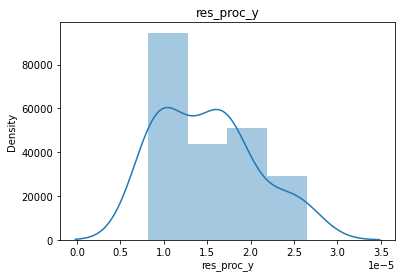

In [62]:
sns.distplot(salary_data['res_proc_y'])
plt.title("res_proc_y")
plt.show()

In [63]:
model_3 = smf.ols('res_proc_y~X',data=salary_data).fit()

In [64]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             res_proc_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.63e-13
Time:                        21:24:26   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
X          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_3.rsquared

0.8608672473082564

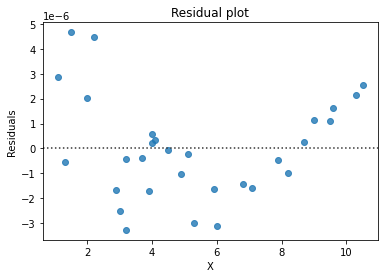

In [66]:
sns.residplot(x=salary_data['X'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

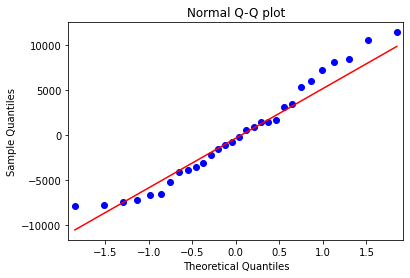

In [67]:
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

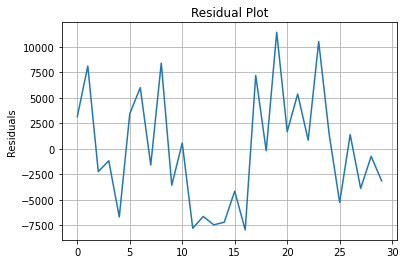

In [68]:
plt.plot(model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [69]:
test_data=salary_data['X']

In [70]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [71]:
actual = salary_data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

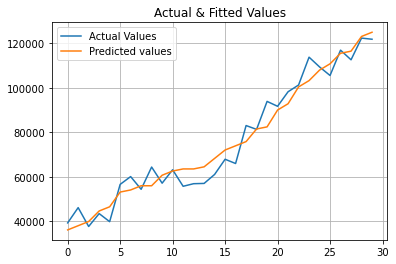

In [72]:
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

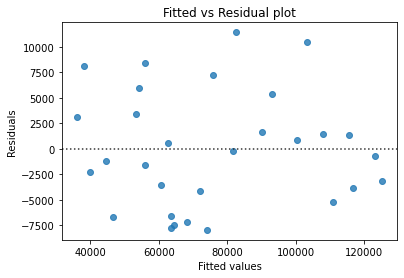

In [73]:
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()